# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *mlp.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.

## Note: you will deal with a lot of different types data in this exercise! For quick inspection and easier debugging (including when you need to ask a TA for help) use the Spyder IDE and its Variable explorer tab.

##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function plot_confusion_matrix(cm,y) below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


In [31]:
import seaborn as sn
import pandas as pd
import numpy as np
import scipy.io as io
import sklearn.neighbors as nb
import matplotlib.pyplot as pp

def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()
    


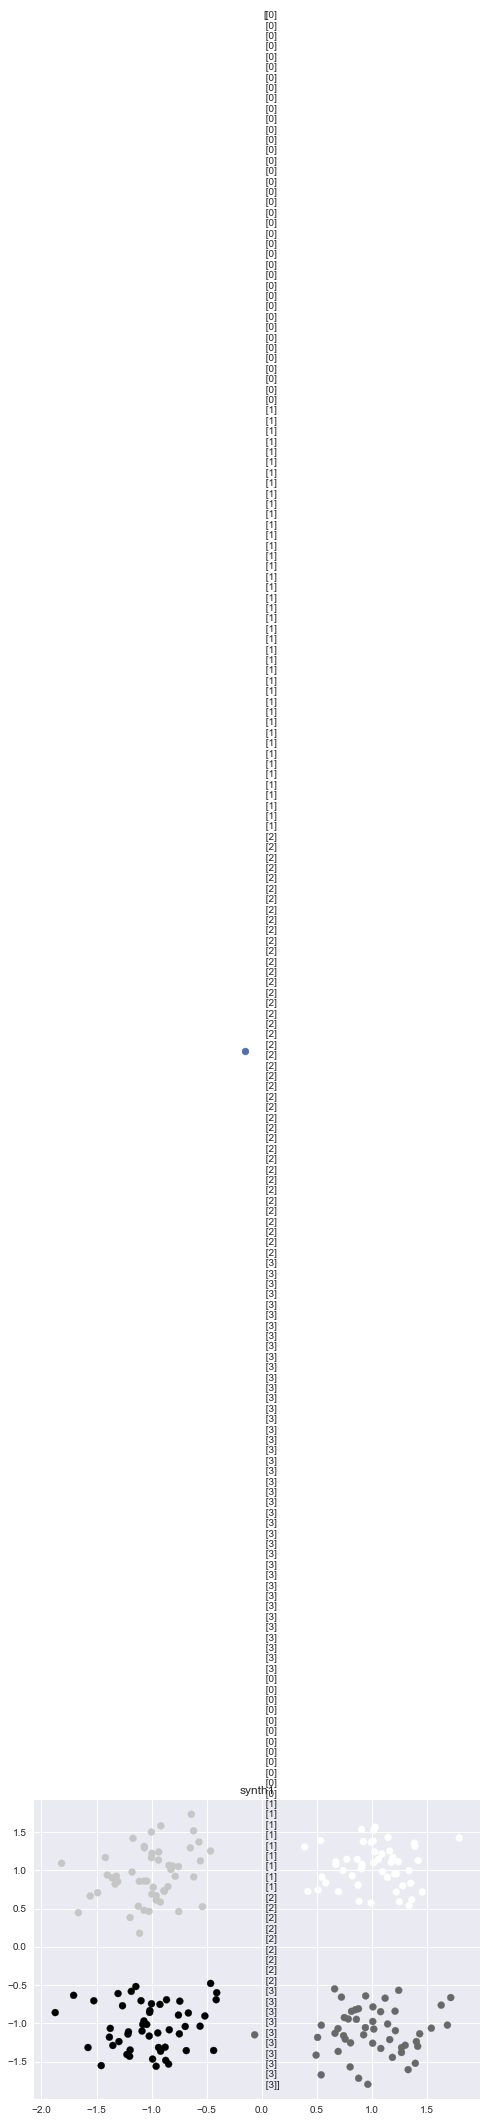

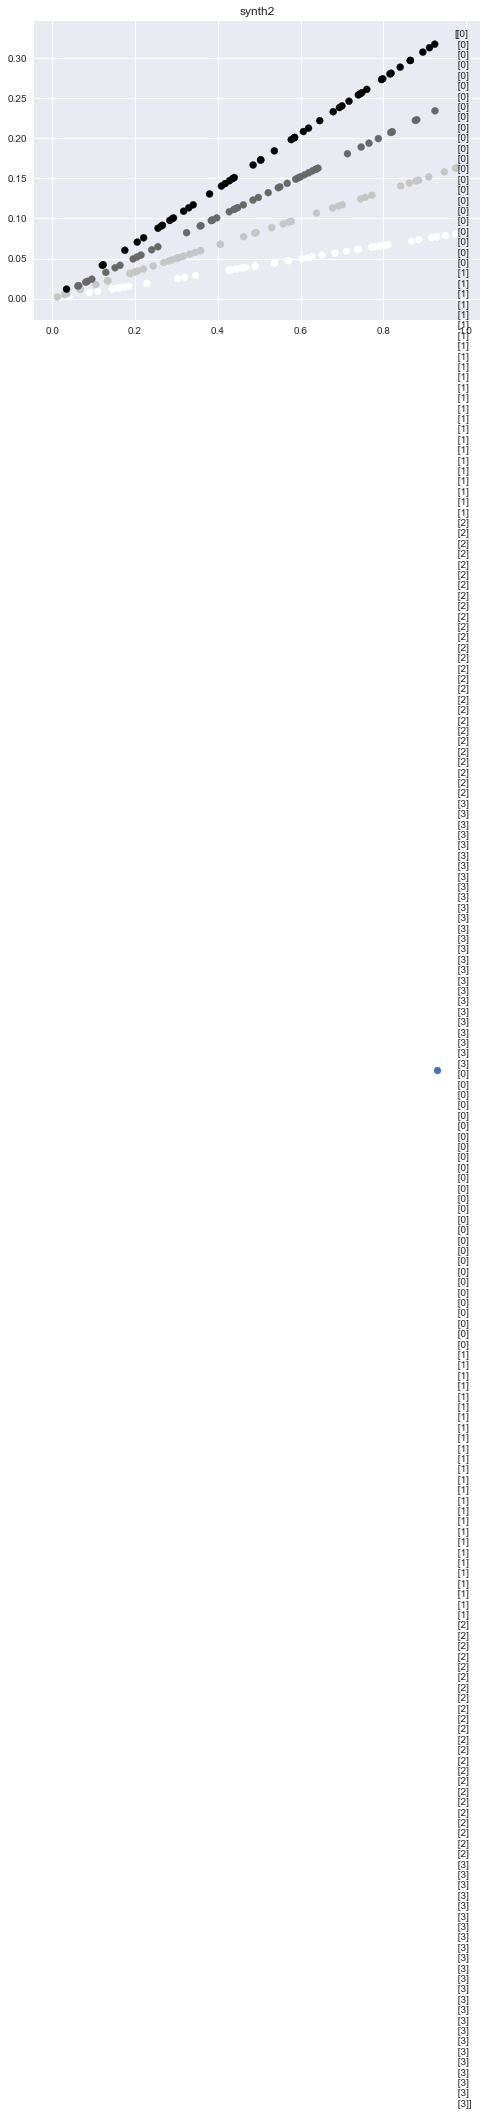

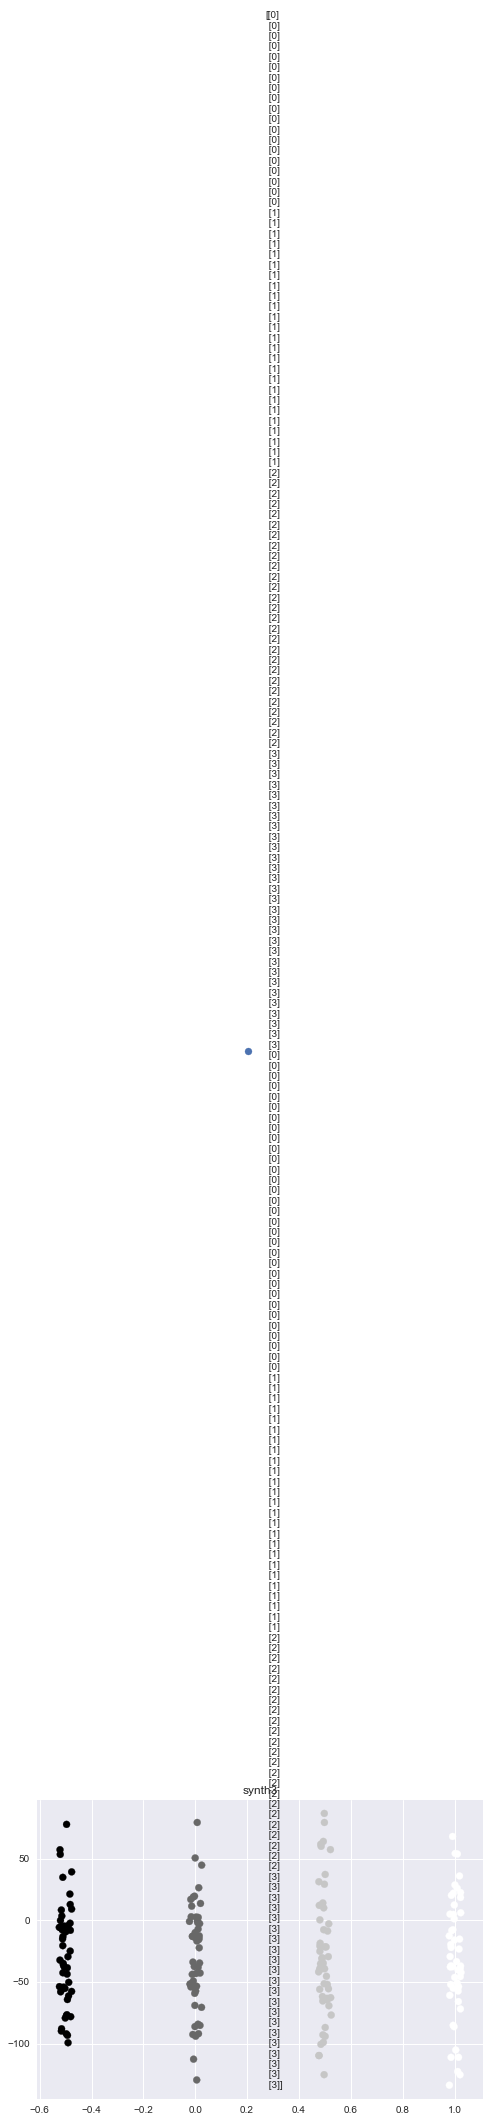

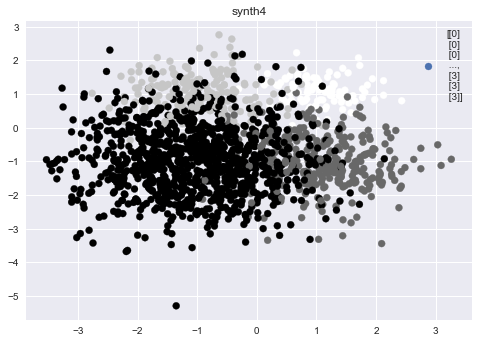

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [95]:
data1 = io.loadmat("Data/synth1") 
data2 = io.loadmat("Data/synth2") 
data3 = io.loadmat("Data/synth3") 
data4 = io.loadmat("Data/synth4") 
X1 = data1['X']
y1= data1['y']
X2 = data2['X']
y2= data2['y']
X3 = data3['X']
y3= data3['y']
X4 = data4['X']
y4= data4['y']


pp.scatter(X1[:, 0], X1[:, 1], c=y1, label=y1[:])
pp.legend()
pp.title("synth1")
pp.show()

pp.scatter(X2[:, 0], X2[:, 1], c=y2, label=y2[:])
pp.legend()
pp.title("synth2")
pp.show()

pp.scatter(X3[:, 0], X3[:, 1], c=y3, label=y3[:])
pp.legend()
pp.title("synth3")
pp.show()

pp.scatter(X4[:, 0], X4[:, 1], c=y4, label=y4[:])
pp.legend()
pp.title("synth4")
pp.show()

a1=nb.KNeighborsClassifier(X1, metric="euclidean")
a1.fit(X1, np.ravel(y1, (200,1)))
pp.scatter(X1[:, 0], X1[:, 1], c=a1, label=y1[:])
#pp.legend()
pp.title("synth1")
pp.show()


*Double click to type your answer for 6.1.1 here:*


#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

In [72]:
import pandas as p
import sklearn.model_selection as sel

data = p.read_excel("Data/iris.xls")
data.head()
X = data[['Sepal Length', 'Petal Width']]
y = data['Type']
a = sel.LeaveOneOut()
for i in range (1, 40):
    a.split(X, y, i)
    


*Double click to type your answer for 6.1.2 here:*


#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

In [113]:
import sklearn.neighbors as nb

data = io.loadmat("Data/wine")
X=data['X'[0:9]]
alcohol=data['X'[10]]

a=nb.NearestNeighbors()
a.fit(X)
for i in X:
    nb.kneigbors(i, 41, return_distance=False)
    

IndexError: string index out of range

*Double click to type your answer for 6.1.3 here:*

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class MLP contained in the `mlp.py` file can be used to create a Multilayer Perceptron that can learn weights that minimize $W = \{W_o,W_h\}$ the objective function $E(X,y,(W_o,W_h)) = \sum_i (f(W_o*f(W_h*X_i)) - y_i)$ for any dataset X with corresponding labels y. We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the MLP class in the Toolbox and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single layer perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is the sigmoid function. Why does it not make sense for an MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The function that learns the weights W mentioned above is the function `learn_weights()` which has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `nhidden`:

> `nepochs`:

> `eta`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1]).reshape(4,1)`
     
   The command `perceptron = mlp.MLP(Xtest,ytest)` will create a instance of the MLP class. Now you can learn the weights for one hidden unit by using `wh,wo,c = perceptron.learn_weights()`. What are the weights after learning? And the classification error? use the function `perceptron.plot_boundaries(wh,wo,Xtest)` to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

##### NOTE: the weights are initiated randomly -- if the result looks strange, it may help to run the learning process again.

Iteration: 0 / 8000 ; misclassication rate: 0.7500
Iteration: 500 / 8000 ; misclassication rate: 0.7500
Iteration: 1000 / 8000 ; misclassication rate: 0.0000
Iteration: 1500 / 8000 ; misclassication rate: 0.0000
Iteration: 2000 / 8000 ; misclassication rate: 0.0000
Iteration: 2500 / 8000 ; misclassication rate: 0.0000
Iteration: 3000 / 8000 ; misclassication rate: 0.0000
Iteration: 3500 / 8000 ; misclassication rate: 0.0000
Iteration: 4000 / 8000 ; misclassication rate: 0.0000
Iteration: 4500 / 8000 ; misclassication rate: 0.0000
Iteration: 5000 / 8000 ; misclassication rate: 0.0000
Iteration: 5500 / 8000 ; misclassication rate: 0.0000
Iteration: 6000 / 8000 ; misclassication rate: 0.0000
Iteration: 6500 / 8000 ; misclassication rate: 0.0000
Iteration: 7000 / 8000 ; misclassication rate: 0.0000
Iteration: 7500 / 8000 ; misclassication rate: 0.0000
Final misclassification rate: 0.0000


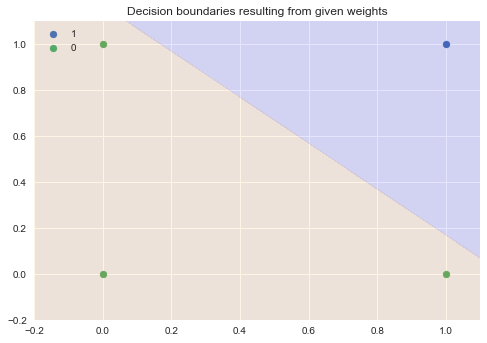

In [91]:
import mlp
Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])
ytest = np.array([0,0,0,1]).reshape(4,1)
perceptron = mlp.MLP(Xtest,ytest)
wh,wo,c = perceptron.learn_weights(nhidden=1)
perceptron.plot_boundaries(wh,wo,Xtest)

*Double click to type your answer for 6.2.1 here:*
1.
2.
with nhidden set to a higher number, you will get a more accurate result, because it can make more complicated shapes with every extra hidden layer
nepochs changes the number of learning steps, so it will better adjust the layers if it has more steps
eta changes the learning rate 
3.
It works quite well with one hidden unit, because there is only one point that is classified differently from the rest, so one linear line is enough to make a boundary. With more layers, the result is the same, because this single linear line is already a perfect solution.

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make a scatter plot of the two attributes in `X`, coloring the points according to the class label `y`. How are `X` and `y` related?

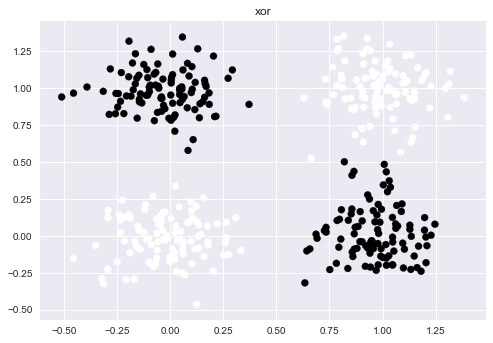

In [80]:
import scipy.io
mat = scipy.io.loadmat('Data/xor.mat')
X = mat['X']
y = mat['y']

pp.scatter(X[:, 0], X[:, 1], c=y, label=y[:])
#pp.legend()
pp.title("xor")
pp.show()


*Double click to type your answer for 6.2.2 here:*

X are the input values, while y is the truth value that is the result of the xor of the two values in X

You will now use the MLP class to create and learn the weights of a mlp. The constructor `mlp.MLP(X,y)` takes 2 arguments, X and y. Save the instance you created in a variable `perceptron`. The function `learn_weights()` will return the weights between the input layer and hidden layer, `W_h`, the weights between the hidden layer and the output layer, `W_o`, and the classification error  


#### 6.2.3 (2 points)
Create a MLP using X and y. Learn the weights `Wh,Wo` using 1 hidden unit. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. Since the algorithm doesn't always converge, restart the learning process 5 times in each fold and take the best classification error.  

You can get the training error from the `learn_weights()` function. Set the optional parameter `verbose=False` to prevent cluttering the output with print statements. The test error can be obtained by feeding the test data through the network using the function `forwardprop(W_h,W_o,X=X_test)`. `forwardprop` will then return a few variables (h,o,grad_h,grad_o, and y_hat), of which the last is the output of the network. You can compare this output `y_hat` to the actual labels in `y_test`. So:

>`_,_,_,_,y_hat = perceptron.forwardprop(Wh,Wo,X=X_test)
> test_error = ... #compare y_hat to y_test`




Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

Iteration: 0 / 8000 ; misclassication rate: 0.5000
Iteration: 500 / 8000 ; misclassication rate: 0.2525
Iteration: 1000 / 8000 ; misclassication rate: 0.2525
Iteration: 1500 / 8000 ; misclassication rate: 0.2525
Iteration: 2000 / 8000 ; misclassication rate: 0.2525
Iteration: 2500 / 8000 ; misclassication rate: 0.2525
Iteration: 3000 / 8000 ; misclassication rate: 0.2525
Iteration: 3500 / 8000 ; misclassication rate: 0.2525
Iteration: 4000 / 8000 ; misclassication rate: 0.2525
Iteration: 4500 / 8000 ; misclassication rate: 0.2525
Iteration: 5000 / 8000 ; misclassication rate: 0.2525
Iteration: 5500 / 8000 ; misclassication rate: 0.2525
Iteration: 6000 / 8000 ; misclassication rate: 0.2525
Iteration: 6500 / 8000 ; misclassication rate: 0.2525
Iteration: 7000 / 8000 ; misclassication rate: 0.2525
Iteration: 7500 / 8000 ; misclassication rate: 0.2525
Final misclassification rate: 0.2525


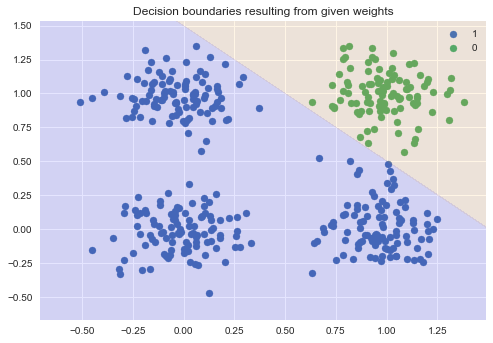

In [84]:
perc = mlp.MLP(X,y)
w1,w2,c = perc.learn_weights(nhidden=1)
perc.plot_boundaries(w1,w2,X)

*Double click to type your answer for 6.2.3 here:*
with one layer, it can only make one distinction, while you need at least two. So it got 3 out of 4 right, because that is the best you can do with one boundary. 


#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

Iteration: 0 / 8000 ; misclassication rate: 0.5000
Iteration: 500 / 8000 ; misclassication rate: 0.0075
Iteration: 1000 / 8000 ; misclassication rate: 0.0050
Iteration: 1500 / 8000 ; misclassication rate: 0.0050
Iteration: 2000 / 8000 ; misclassication rate: 0.0050
Iteration: 2500 / 8000 ; misclassication rate: 0.0050
Iteration: 3000 / 8000 ; misclassication rate: 0.0050
Iteration: 3500 / 8000 ; misclassication rate: 0.0050
Iteration: 4000 / 8000 ; misclassication rate: 0.0050
Iteration: 4500 / 8000 ; misclassication rate: 0.0050
Iteration: 5000 / 8000 ; misclassication rate: 0.0050
Iteration: 5500 / 8000 ; misclassication rate: 0.0050
Iteration: 6000 / 8000 ; misclassication rate: 0.0050
Iteration: 6500 / 8000 ; misclassication rate: 0.0050
Iteration: 7000 / 8000 ; misclassication rate: 0.0050
Iteration: 7500 / 8000 ; misclassication rate: 0.0050
Final misclassification rate: 0.0050


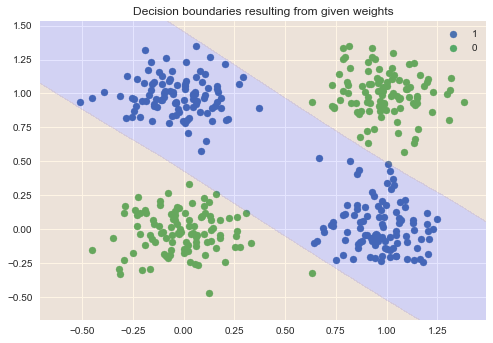

In [85]:
perc = mlp.MLP(X,y)
w1,w2,c = perc.learn_weights(nhidden=2)
perc.plot_boundaries(w1,w2,X)

*Double click to type your answer for 6.2.4 here:*
Now it had two boundaries, so it can classify the 4 main groups. It still got a few point wrong.

#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

Iteration: 0 / 8000 ; misclassication rate: 0.5000
Iteration: 500 / 8000 ; misclassication rate: 0.0025
Iteration: 1000 / 8000 ; misclassication rate: 0.0025
Iteration: 1500 / 8000 ; misclassication rate: 0.0000
Iteration: 2000 / 8000 ; misclassication rate: 0.0000
Iteration: 2500 / 8000 ; misclassication rate: 0.0000
Iteration: 3000 / 8000 ; misclassication rate: 0.0000
Iteration: 3500 / 8000 ; misclassication rate: 0.0000
Iteration: 4000 / 8000 ; misclassication rate: 0.0000
Iteration: 4500 / 8000 ; misclassication rate: 0.0000
Iteration: 5000 / 8000 ; misclassication rate: 0.0000
Iteration: 5500 / 8000 ; misclassication rate: 0.0000
Iteration: 6000 / 8000 ; misclassication rate: 0.0000
Iteration: 6500 / 8000 ; misclassication rate: 0.0000
Iteration: 7000 / 8000 ; misclassication rate: 0.0000
Iteration: 7500 / 8000 ; misclassication rate: 0.0000
Final misclassification rate: 0.0000


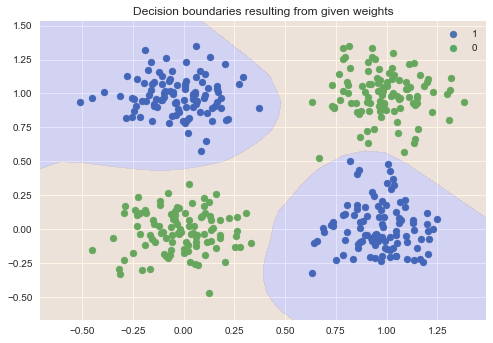

In [86]:
perc = mlp.MLP(X,y)
w1,w2,c = perc.learn_weights(nhidden=10)
perc.plot_boundaries(w1,w2,X)

*Double click to type your answer for 6.2.5 here:*
Now it got all the points correct. The decision boundaries aren't straight lines anymore, they were made to fit every point perfectly. With this many hidden units, it might change the shape too much depending on outliers, because it tries to have no error at all.